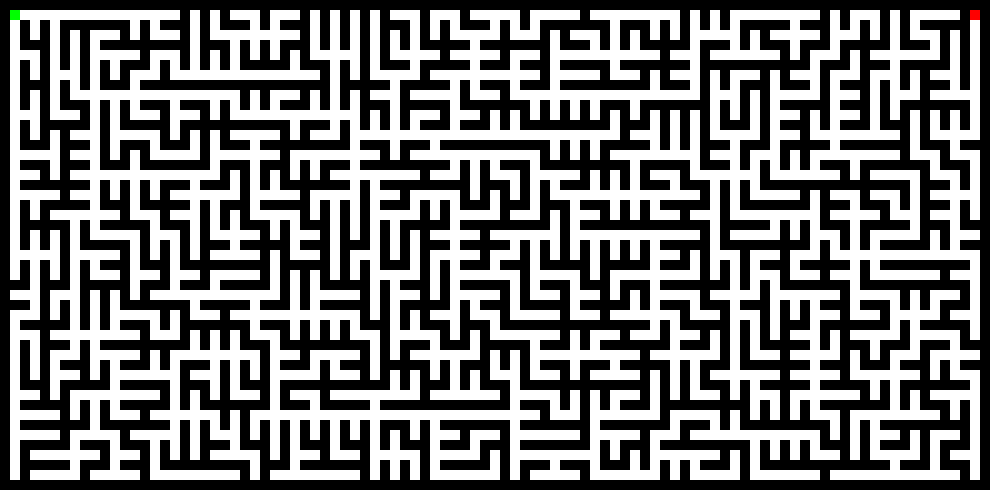

In [5]:
from bin.maze import maze

m = maze(size=(49, 99))
m.generate()
